In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [219]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Upload data

Here is a summary of the dataset in points:

- <font color = "cyan"> Dataset Overview </font>
  - Contains temperature data for **35 European cities**.
  - Cities are divided into:
    - **Capitals**: Rows 1 to 24 (e.g., Amsterdam to Stockholm).
    - **Major cities (non-capitals)**: Rows 25 to 35 (e.g., Antwerp to Zurich).

- <font color = "cyan"> Variables </font>
  - **Quantitative**: 15 variables.
    - Indexed from 1 (January) to 12 (December) for monthly temperatures.
    - Variables 13 (Average Temperature) to 16 (Longitude) are supplementary.
  - **Qualitative**: 1 variable (`Région`), indicating the geographic location of the city.

- <font color = "cyan"> Scope of the Exercise </font>:
  - Focuses only on **European capitals** (23 rows).
  - Analyzes variables **1 to 12** (monthly temperatures).

- <font color = "cyan">Filtered Dataset this Study </font>
  - Rows: **23** (European capitals only).
  - Columns: **12** (Monthly temperatures).

In [220]:
data_path = "/content/drive/MyDrive/e-business/temperature.xlsx"

# data_path = "temperature.xlsx"

# Import data
data = pd.read_excel(data_path)[:23]
data

,Ville,Janvier,Février,Mars,Avril,Mai,Juin,Juillet,Août,Septembre,Octobre,Novembre,Décembre,Moyenne,Amplitude,Latitude,Longitude,Région
0,Amsterdam,2.9,2.5,5.7,8.2,12.5,14.8,17.1,17.1,14.5,11.4,7.0,4.4,9.9,14.6,52.2,4.5,Ouest
1,Athènes,9.1,9.7,11.7,15.4,20.1,24.5,27.4,27.2,23.8,19.2,14.6,11.0,17.8,18.3,37.6,23.5,Sud
2,Berlin,-0.2,0.1,4.4,8.2,13.8,16.0,18.3,18.0,14.4,10.0,4.2,1.2,9.1,18.5,52.3,13.2,Ouest
3,Bruxelles,3.3,3.3,6.7,8.9,12.8,15.6,17.8,17.8,15.0,11.1,6.7,4.4,10.3,14.4,50.5,4.2,Ouest
4,Budapest,-1.1,0.8,5.5,11.6,17.0,20.2,22.0,21.3,16.9,11.3,5.1,0.7,10.9,23.1,47.3,19.0,Est
5,Copenhague,-0.4,-0.4,1.3,5.8,11.1,15.4,17.1,16.6,13.3,8.8,4.1,1.3,7.8,17.5,55.4,12.3,Nord
6,Dublin,4.8,5.0,5.9,7.8,10.4,13.3,15.0,14.6,12.7,9.7,6.7,5.4,9.3,10.2,53.2,6.1,Nord
7,Helsinki,-5.8,-6.2,-2.7,3.1,10.2,14.0,17.2,14.9,9.7,5.2,0.1,-2.3,4.8,23.4,60.1,25.0,Nord
8,Kiev,-5.9,-5.0,-0.3,7.4,14.3,17.8,19.4,18.5,13.7,7.5,1.2,-3.6,7.1,25.3,50.3,30.3,Est
9,Cracovie,-3.7,-2.0,1.9,7.9,13.2,16.9,18.4,17.6,13.7,8.6,2.6,-1.7,7.7,22.1,50.0,19.6,Est


# Part 1: Principal Component Analysis (PCA)

## Question 1

It is necessary to center and scale the data before applying PCA.

Centering ensures that PCA captures variance relative to the true spread of the data rather than the offset caused by the mean.

Scaling ensures that all variables contribute equally to the analysis. It makes all the data have the same "weight" within the PCA.

## Question 2

In [221]:
X = data.values[:,1:-5]
X

array([[2.9, 2.5, 5.7, 8.2, 12.5, 14.8, 17.1, 17.1, 14.5, 11.4, 7.0, 4.4],
       [9.1, 9.7, 11.7, 15.4, 20.1, 24.5, 27.4, 27.2, 23.8, 19.2, 14.6,
        11.0],
       [-0.2, 0.1, 4.4, 8.2, 13.8, 16.0, 18.3, 18.0, 14.4, 10.0, 4.2,
        1.2],
       [3.3, 3.3, 6.7, 8.9, 12.8, 15.6, 17.8, 17.8, 15.0, 11.1, 6.7, 4.4],
       [-1.1, 0.8, 5.5, 11.6, 17.0, 20.2, 22.0, 21.3, 16.9, 11.3, 5.1,
        0.7],
       [-0.4, -0.4, 1.3, 5.8, 11.1, 15.4, 17.1, 16.6, 13.3, 8.8, 4.1,
        1.3],
       [4.8, 5.0, 5.9, 7.8, 10.4, 13.3, 15.0, 14.6, 12.7, 9.7, 6.7, 5.4],
       [-5.8, -6.2, -2.7, 3.1, 10.2, 14.0, 17.2, 14.9, 9.7, 5.2, 0.1,
        -2.3],
       [-5.9, -5.0, -0.3, 7.4, 14.3, 17.8, 19.4, 18.5, 13.7, 7.5, 1.2,
        -3.6],
       [-3.7, -2.0, 1.9, 7.9, 13.2, 16.9, 18.4, 17.6, 13.7, 8.6, 2.6,
        -1.7],
       [10.5, 11.3, 12.8, 14.5, 16.7, 19.4, 21.5, 21.9, 20.4, 17.4, 13.7,
        11.1],
       [3.4, 4.2, 5.5, 8.3, 11.9, 15.1, 16.9, 16.5, 14.0, 10.2, 6.3, 4.4],
       [5.0, 6.6

In [222]:
# Import
from sklearn.preprocessing import StandardScaler

In [223]:
# Centering and Standardizing Data
Z = StandardScaler().fit_transform(X)
df_Z = pd.DataFrame(Z, columns=data.columns[1:-5])
print(Z)

[[ 0.53806681  0.30819317  0.37313567 -0.05250287 -0.26156905 -0.64016627
  -0.54856845 -0.3415513  -0.05668321  0.34492335  0.464655    0.56621864]
 [ 1.76180409  1.74584917  1.73899037  2.06810076  2.30709784  2.51959245
   2.54561884  2.52279408  2.46926215  2.3605341   2.30224988  2.02798718]
 [-0.07380183 -0.1710255   0.07720048 -0.05250287  0.17780818 -0.24926828
  -0.18808061 -0.0863126  -0.08384391 -0.01685293 -0.21235364 -0.14251762]
 [ 0.6170176   0.46793272  0.60077812  0.15366693 -0.16017431 -0.37956761
  -0.33828388 -0.14303231  0.07912031  0.26739986  0.39211836  0.56621864]
 [-0.25144111 -0.03125339  0.32760718  0.94889329  1.25935213  1.11887467
   0.92342356  0.84956262  0.59517366  0.31908219  0.00525628 -0.25325766]
 [-0.11327722 -0.27086273 -0.62849111 -0.75937074 -0.73474454 -0.44471727
  -0.54856845 -0.48335058 -0.38261164 -0.32694689 -0.23653252 -0.12036961]
 [ 0.91308307  0.80737928  0.41866416 -0.17031418 -0.97133228 -1.12878875
  -1.17942217 -1.05054768 -0.545

In [224]:
# Import
from sklearn.decomposition import PCA

In [225]:
# Instanciation of PCA
pca = PCA()
# The PCA is performed, and the factor scores are retrieved in the matrix 'coord'.
coord = pca.fit_transform(Z)
print(coord)
# Number of principal components
n = (pca.n_components_)
print(n)

[[ 0.22693852 -1.3713787   0.10439354 -0.28279276  0.22523498  0.06201465
   0.01414893  0.03631268 -0.00128671  0.02814351 -0.03185478 -0.00634351]
 [ 7.60067204  0.93037574 -0.56142895 -0.28655724 -0.12128409 -0.02196803
  -0.00969001  0.03548009 -0.02217694  0.02691355  0.01873142  0.00153044]
 [-0.28785832  0.01645407  0.29060835 -0.05559305  0.14177744  0.18244939
   0.15978487  0.01983456 -0.04083765 -0.02455248 -0.02110587 -0.00069986]
 [ 0.63117358 -1.17721764  0.15204276  0.01706987  0.1180803   0.0974073
   0.04533831 -0.01570909  0.03239746  0.07128543  0.03816861 -0.00359662]
 [ 1.66802839  1.71269773  0.49898331  0.11243655 -0.1474938   0.06166089
   0.00351093 -0.02829412  0.00585999  0.00509691 -0.01497985 -0.02280278]
 [-1.46239513 -0.49205631 -0.44036858 -0.17671615 -0.0013598  -0.18884831
   0.10157357 -0.00938437  0.00446928 -0.0263817   0.02282617 -0.02375004]
 [-0.50524137 -2.67349692  0.17850939  0.02991118 -0.19948911 -0.0096132
  -0.06304325 -0.03256596  0.04927

## Question 3

The variance of each component represent the amount of variability in the original dataset that is represented by that specific component.

The total variance explained by all the components is 100%. It is the variance of our dataset.

In [226]:
# Retrieve the eigenvalues / variance / inertia.
# The variance is estimated with n-1 degrees of freedom.
variance = pca.explained_variance_

# An adjustment is necessary to obtain the variance with n degrees of freedom.
eigval = variance*(len(Z)-1)/len(Z)

print(np.sum(eigval,axis=0))

# Eigenvalue representation ratio or the percentage of inertia explained by each axis
np.set_printoptions(suppress=True)
print(pca.explained_variance_ratio_*100)

11.999999999999996
[82.89792017 15.39707085  1.0521317   0.31911205  0.13924507  0.10694196
  0.04858578  0.01693244  0.00852876  0.00793976  0.00447319  0.00111826]


## Question 4

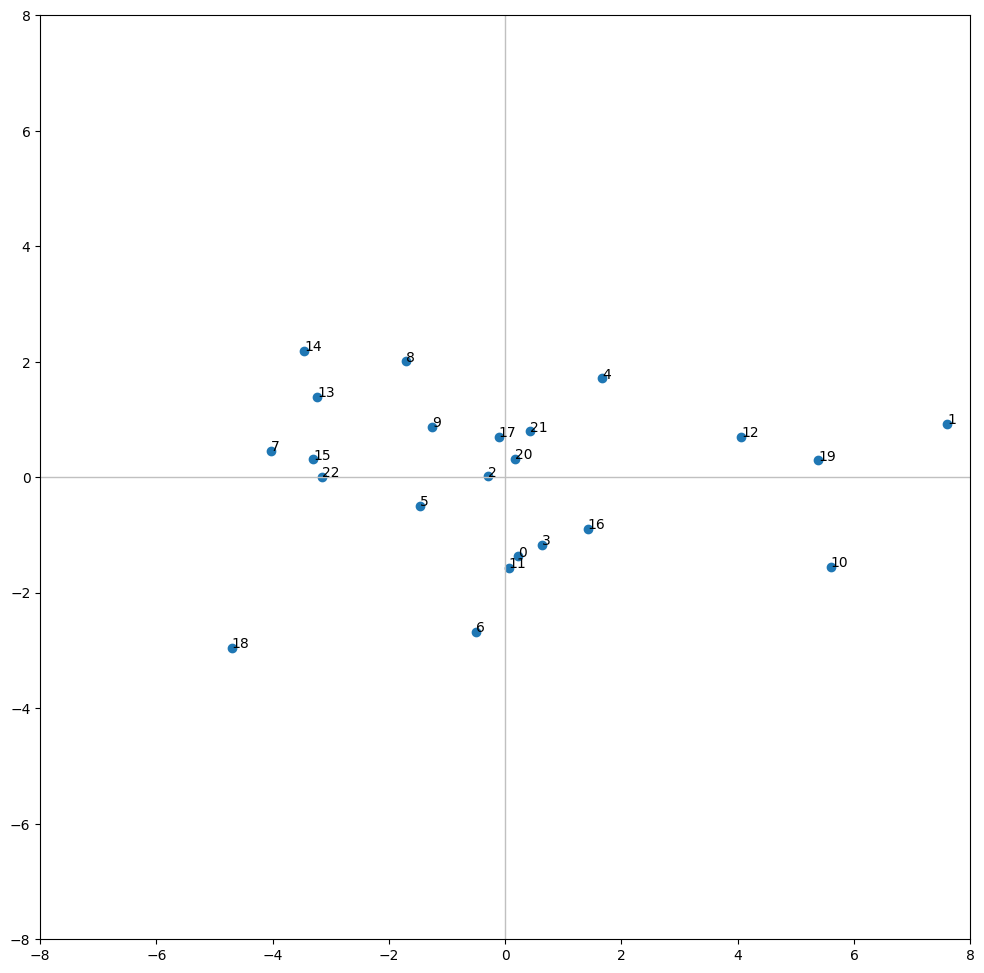

In [227]:
# Creation of the graph
fig, ax = plt.subplots(figsize=(12,12))
ax.set_xlim(-8,8)
ax.set_ylim(-8,8)

# Placement of the points
plt.scatter(coord[:,0],coord[:,1])

# Placement of the observation labels
for i in range(len(Z)):
     plt.annotate(data.index[i],(coord[i,0],coord[i,1]))

# Addition of axes
plt.plot([-8,8],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-8,8],color='silver',linestyle='-',linewidth=1)

# Display
plt.show()

It seems that data are far more correlated with the first variable than with the second.

We can assume that the data can be separated into 3 clusters.

# Part 2: K-Means Clustering

## Question 1

- The elbow method measures inertia (sum of intra-cluster distances). The inertia is plotted as a function of K and the ‘elbow’ is sought, where the decrease becomes marginal.
- The silhouette criterion evaluates the quality of the clusters via a score (between -1 and 1) based on internal cohesion and separation between clusters. The best value of K maximises this score.

The elbow method is simple and visual, but can be subjective. The silhouette criterion is more precise and considers cluster separation. The two are often combined to validate K.

## Question 2

We're going to perform the silhouette method on Z, the centred and reduced dataset.

In [228]:
# Import
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Silhouette Score for K-Means with 2 clusters: 0.3665
Silhouette Score for K-Means with 3 clusters: 0.4289
Silhouette Score for K-Means with 4 clusters: 0.4258
Silhouette Score for K-Means with 5 clusters: 0.3703
Silhouette Score for K-Means with 6 clusters: 0.3391
Silhouette Score for K-Means with 7 clusters: 0.2934


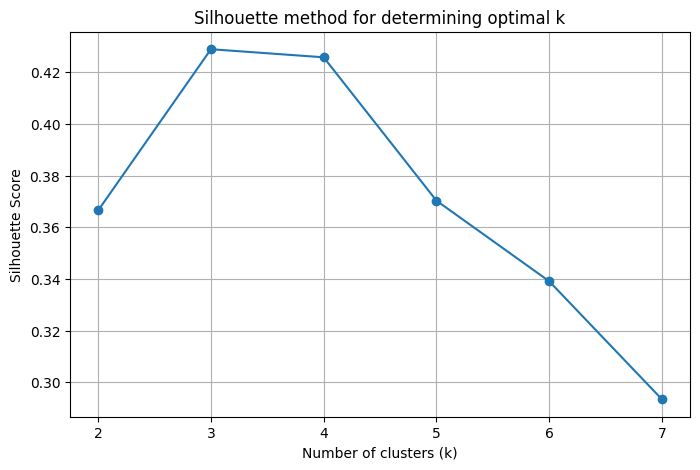

In [229]:
# Apply K-Means with different numbers of clusters
n_clusters_list = [2, 3, 4, 5, 6, 7]
silhouette_scores = []

for n_clusters in n_clusters_list:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    y_kmeans = kmeans.fit_predict(Z)

    # Calculate the silhouette score for the current number of clusters
    sil_score = silhouette_score(Z, y_kmeans)
    silhouette_scores.append(sil_score)

# Print Silhouette Scores
for n_clusters, score in zip(n_clusters_list, silhouette_scores):
    print(f"Silhouette Score for K-Means with {n_clusters} clusters: {score:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(n_clusters_list, silhouette_scores, marker='o')
plt.title("Silhouette method for determining optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

It seems that the optimal number of clusters is 3.

## Question 3

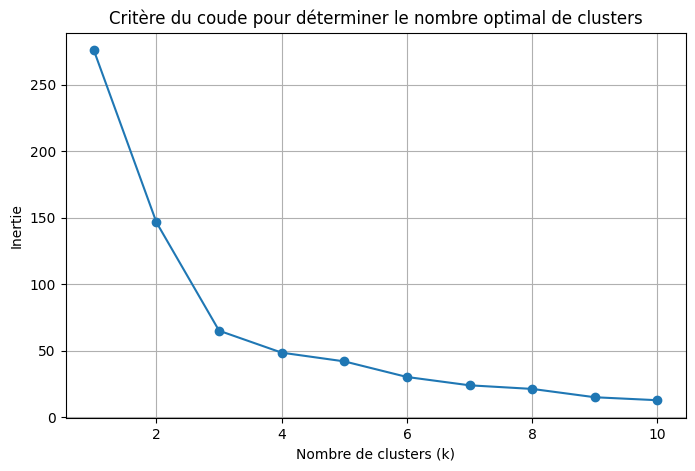

In [230]:
# Appliquer le K-means clustering avec différents nombres de clusters
inertia = []
range_n_clusters = range(1, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(Z)
    inertia.append(kmeans.inertia_)

# Tracer le graphique du critère du coude
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title("Critère du coude pour déterminer le nombre optimal de clusters")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie")
plt.grid()
plt.show()

The elbow criterion also seems to show that 3 is the optimal number of clusters.

## Question 4

In [231]:
# Appliquer le K-means clustering avec 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_3.fit(Z)

# Ajouter les labels des clusters au DataFrame Z
df_Z['Cluster'] = kmeans_3.labels_

# Afficher les résultats
print(df_Z)

     Janvier   Février      Mars     Avril       Mai      Juin   Juillet  \
0   0.538067  0.308193  0.373136 -0.052503 -0.261569 -0.640166 -0.548568   
1   1.761804  1.745849  1.738990  2.068101  2.307098  2.519592  2.545619   
2  -0.073802 -0.171026  0.077200 -0.052503  0.177808 -0.249268 -0.188081   
3   0.617018  0.467933  0.600778  0.153667 -0.160174 -0.379568 -0.338284   
4  -0.251441 -0.031253  0.327607  0.948893  1.259352  1.118875  0.923424   
5  -0.113277 -0.270863 -0.628491 -0.759371 -0.734745 -0.444717 -0.548568   
6   0.913083  0.807379  0.418664 -0.170314 -0.971332 -1.128789 -1.179422   
7  -1.179113 -1.428975 -1.539061 -1.554597 -1.038929 -0.900765 -0.518528   
8  -1.198851 -1.189365 -0.992719 -0.288125  0.346799  0.337079  0.142367   
9  -0.764621 -0.590342 -0.491906 -0.140861 -0.024981  0.043905 -0.158040   
10  2.038132  2.065328  1.989397  1.803025  1.157957  0.858276  0.773220   
11  0.636755  0.647640  0.327607 -0.023050 -0.464359 -0.542442 -0.608650   
12  0.952558

## Question 5

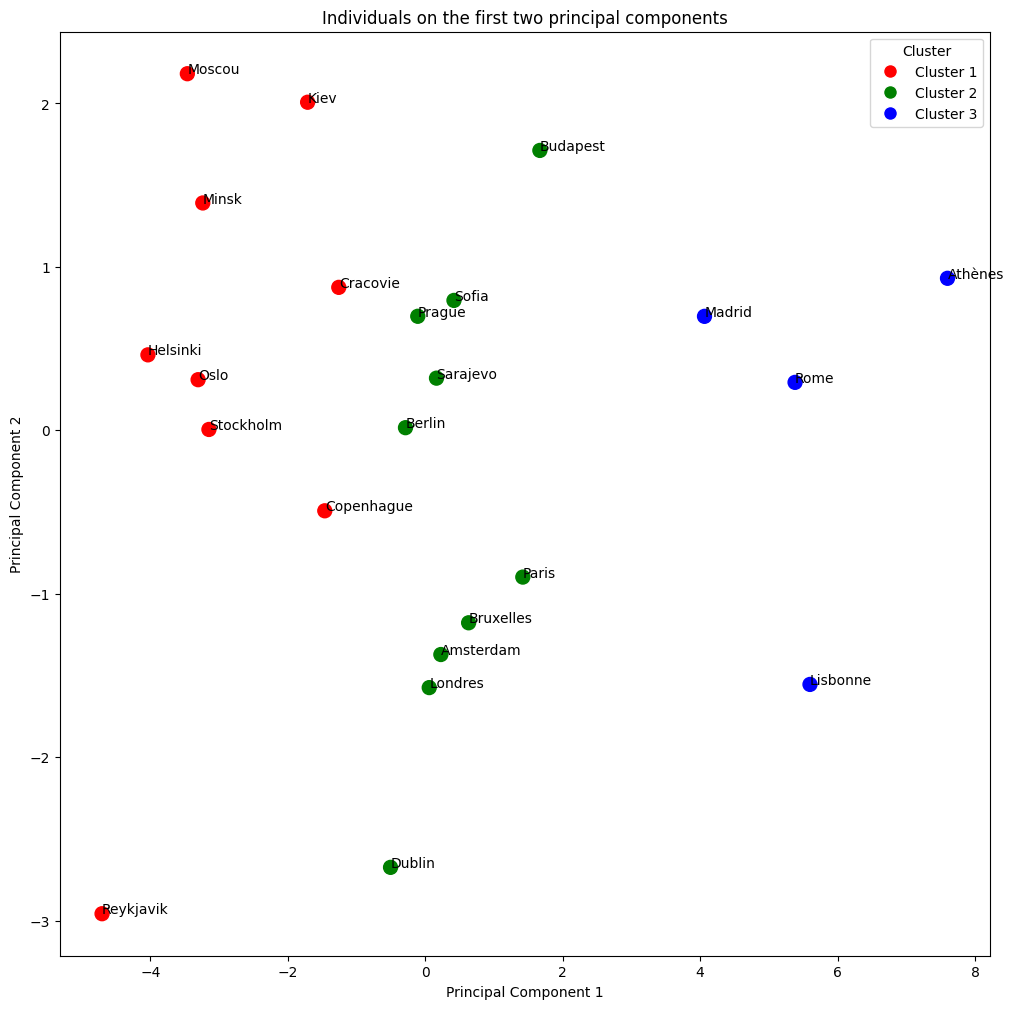

In [232]:
# Plotting the individuals on the first two principal components
fig, ax = plt.subplots(figsize=(12, 12))

# Define colors for each cluster
colors = ['red', 'green', 'blue']
cluster_colors = [colors[label] for label in df_Z['Cluster']]

# Scatter plot of the individuals
scatter = ax.scatter(coord[:, 0], coord[:, 1], c=cluster_colors, s=100)

# Adding labels to the points
for i in range(len(coord)):
    ax.annotate(data['Ville'][i], (coord[i, 0], coord[i, 1]))

# Adding titles and labels
ax.set_title('Individuals on the first two principal components')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

# Create a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3']
ax.legend(handles, labels, title='Cluster')

# Display the plot
plt.show()

## Question 6

In [233]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['Région'], df_Z['Cluster'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 24.299682539682543
P-value: 0.0004599454531997158
Degrees of freedom: 6
Expected frequencies:
[[2.73913043 3.04347826 1.2173913 ]
 [2.73913043 3.04347826 1.2173913 ]
 [1.56521739 1.73913043 0.69565217]
 [1.95652174 2.17391304 0.86956522]]


The results suggest that there is a significant relationship between the two variables analysed (as the p-value is very low). Our clustering is therefore consistent with the regions of the cities studied.

## Question 7

The 3 clusters created appear to be very coherent. Indeed, we can see that cluster 1 (in red on the graph) brings together cities from Northern and Eastern Europe. Cluster 2 (in green) includes cities in Western and Central Europe. Cluster 3 (in blue) is made up of cities in southern Europe.

# Part 3: DBSCAN Clustering

## Question 1

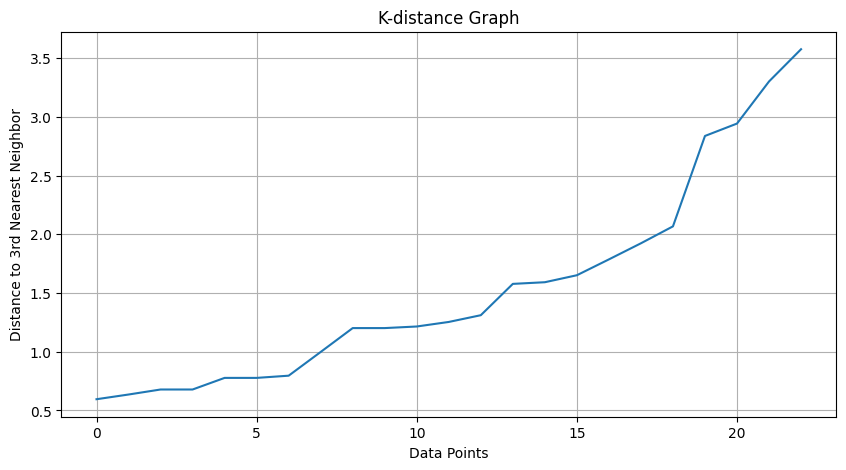

[0.5953053  0.63537967 0.67812354 0.67812354 0.77706244 0.77706244
 0.79583902 0.99802695 1.20148627 1.20148627 1.21502144 1.25376037
 1.31123252 1.57812423 1.59224988 1.65179311 1.78684157 1.92402905
 2.06821621 2.83857438 2.94420086 3.3029529  3.57766797]


In [234]:
from sklearn.neighbors import NearestNeighbors

# Assuming 'Z' is your scaled dataset from previous parts
# Calculate the distances to the 3 nearest neighbors
neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(Z)
distances, indices = neighbors_fit.kneighbors(Z)

# Sort the distances to the 3rd nearest neighbor
distances = np.sort(distances, axis=0)
distances = distances[:,2]

# Plot the distances
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Data Points')
plt.ylabel('Distance to 3rd Nearest Neighbor')
plt.grid()
plt.show()

print(distances)


We can see that the optimal value of 'eps' is 2,07 because it is the value where the graph shows a significant increase.

Cluster Labels: [ 0 -1  0  0  0  0  0  0  0  0  1  0  1  0  0  0  0  0 -1  1  0  0  0]
Estimated number of clusters: 2
Estimated number of noise points: 2


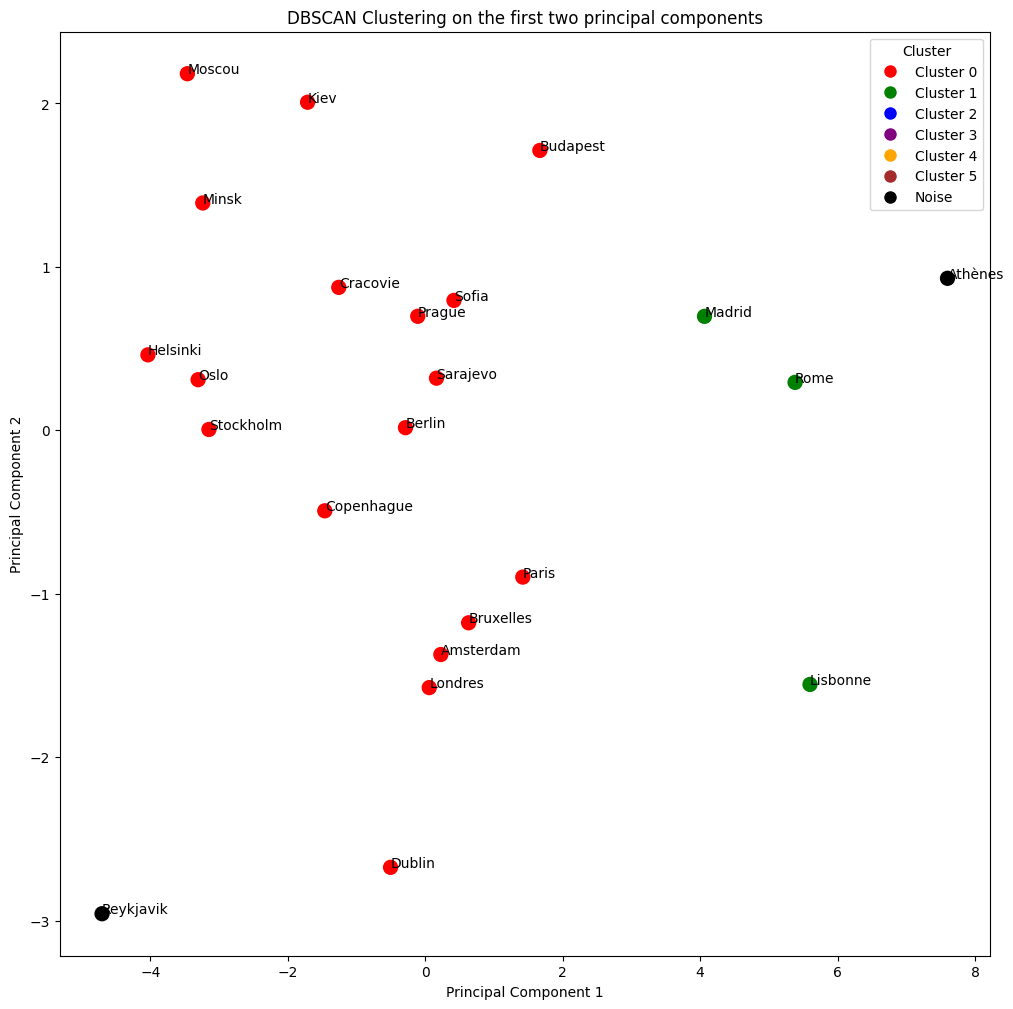

In [235]:
# prompt: Apply DBSCAN with the optimal value of ‘eps’ obtained in the previous step and analyze the
# obtained clusters

from sklearn.cluster import DBSCAN

# Assuming 'Z' is your scaled dataset and 'optimal_eps' is determined from the k-distance graph
# Apply DBSCAN with the optimal eps value
dbscan = DBSCAN(eps=2.07, min_samples=3) # Adjust min_samples if necessary
clusters = dbscan.fit_predict(Z)

# Analyze the obtained clusters
print("Cluster Labels:", clusters)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

# Add cluster labels to the DataFrame
df_Z['DBSCAN_Cluster'] = clusters


fig, ax = plt.subplots(figsize=(12, 12))

# Define colors for each cluster, including noise
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown'] # Add more colors if needed
cluster_colors = [colors[label % len(colors)] if label != -1 else 'black' for label in df_Z['DBSCAN_Cluster']]

# Scatter plot of the individuals
scatter = ax.scatter(coord[:, 0], coord[:, 1], c=cluster_colors, s=100)

# Adding labels to the points
for i in range(len(coord)):
    ax.annotate(data['Ville'][i], (coord[i, 0], coord[i, 1]))

# Adding titles and labels
ax.set_title('DBSCAN Clustering on the first two principal components')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')


# Create a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]
labels = [f'Cluster {i}' for i in range(len(colors))]
handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10, label='Noise'))
labels.append('Noise')
ax.legend(handles, labels, title='Cluster')

# Display the plot
plt.show()

# Part 4: DBSCAN with Reduced Data

## Question 1

In [236]:
cities_to_remove = ['Athènes', 'Madrid', 'Rome', 'Lisbonne']
data = data[~data['Ville'].isin(cities_to_remove)]
data = data.reset_index(drop=True)
data


,Ville,Janvier,Février,Mars,Avril,Mai,Juin,Juillet,Août,Septembre,Octobre,Novembre,Décembre,Moyenne,Amplitude,Latitude,Longitude,Région
0,Amsterdam,2.9,2.5,5.7,8.2,12.5,14.8,17.1,17.1,14.5,11.4,7.0,4.4,9.9,14.6,52.2,4.5,Ouest
1,Berlin,-0.2,0.1,4.4,8.2,13.8,16.0,18.3,18.0,14.4,10.0,4.2,1.2,9.1,18.5,52.3,13.2,Ouest
2,Bruxelles,3.3,3.3,6.7,8.9,12.8,15.6,17.8,17.8,15.0,11.1,6.7,4.4,10.3,14.4,50.5,4.2,Ouest
3,Budapest,-1.1,0.8,5.5,11.6,17.0,20.2,22.0,21.3,16.9,11.3,5.1,0.7,10.9,23.1,47.3,19.0,Est
4,Copenhague,-0.4,-0.4,1.3,5.8,11.1,15.4,17.1,16.6,13.3,8.8,4.1,1.3,7.8,17.5,55.4,12.3,Nord
5,Dublin,4.8,5.0,5.9,7.8,10.4,13.3,15.0,14.6,12.7,9.7,6.7,5.4,9.3,10.2,53.2,6.1,Nord
6,Helsinki,-5.8,-6.2,-2.7,3.1,10.2,14.0,17.2,14.9,9.7,5.2,0.1,-2.3,4.8,23.4,60.1,25.0,Nord
7,Kiev,-5.9,-5.0,-0.3,7.4,14.3,17.8,19.4,18.5,13.7,7.5,1.2,-3.6,7.1,25.3,50.3,30.3,Est
8,Cracovie,-3.7,-2.0,1.9,7.9,13.2,16.9,18.4,17.6,13.7,8.6,2.6,-1.7,7.7,22.1,50.0,19.6,Est
9,Londres,3.4,4.2,5.5,8.3,11.9,15.1,16.9,16.5,14.0,10.2,6.3,4.4,9.7,13.5,51.4,0.0,Nord


## Question 2

In [237]:
X = data.values[:,1:-5]
X

array([[2.9, 2.5, 5.7, 8.2, 12.5, 14.8, 17.1, 17.1, 14.5, 11.4, 7.0, 4.4],
       [-0.2, 0.1, 4.4, 8.2, 13.8, 16.0, 18.3, 18.0, 14.4, 10.0, 4.2,
        1.2],
       [3.3, 3.3, 6.7, 8.9, 12.8, 15.6, 17.8, 17.8, 15.0, 11.1, 6.7, 4.4],
       [-1.1, 0.8, 5.5, 11.6, 17.0, 20.2, 22.0, 21.3, 16.9, 11.3, 5.1,
        0.7],
       [-0.4, -0.4, 1.3, 5.8, 11.1, 15.4, 17.1, 16.6, 13.3, 8.8, 4.1,
        1.3],
       [4.8, 5.0, 5.9, 7.8, 10.4, 13.3, 15.0, 14.6, 12.7, 9.7, 6.7, 5.4],
       [-5.8, -6.2, -2.7, 3.1, 10.2, 14.0, 17.2, 14.9, 9.7, 5.2, 0.1,
        -2.3],
       [-5.9, -5.0, -0.3, 7.4, 14.3, 17.8, 19.4, 18.5, 13.7, 7.5, 1.2,
        -3.6],
       [-3.7, -2.0, 1.9, 7.9, 13.2, 16.9, 18.4, 17.6, 13.7, 8.6, 2.6,
        -1.7],
       [3.4, 4.2, 5.5, 8.3, 11.9, 15.1, 16.9, 16.5, 14.0, 10.2, 6.3, 4.4],
       [-6.9, -6.2, -1.9, 5.4, 12.4, 15.9, 17.4, 16.3, 11.6, 5.8, 0.1,
        -4.2],
       [-9.3, -7.6, -2.0, 6.0, 13.0, 16.6, 18.3, 16.7, 11.2, 5.1, -1.1,
        -6.0],
       [-4.3, -3.8,

In [238]:
# Centering and Standardizing Data
Z = StandardScaler().fit_transform(X)
df_Z = pd.DataFrame(Z, columns=data.columns[1:-5])
print(Z)

[[ 1.13071924  0.88012416  0.96825909  0.41475902  0.06457066 -0.43609237
  -0.30504697  0.03324487  0.5155228   1.12218827  1.31068057  1.24140919]
 [ 0.32637911  0.22541516  0.56495387  0.41475902  0.63417612  0.1162913
   0.25584585  0.43930726  0.47120183  0.54924762  0.23628602  0.2611796 ]
 [ 1.23450507  1.09836049  1.27849387  0.70662647  0.19601807 -0.06783659
   0.02214051  0.34907117  0.73712762  0.99941527  1.19556687  1.24140919]
 [ 0.092861    0.41637195  0.90621213  1.83240095  2.03628186  2.04963416
   1.98526538  1.92820266  1.57922595  1.08126394  0.58162713  0.10801872]
 [ 0.27448619  0.08901745 -0.39677396 -0.5859294  -0.5488506  -0.15990054
  -0.30504697 -0.19234534 -0.01632878  0.05815563  0.19791479  0.29181177]
 [ 1.62370191  1.5621127   1.03030604  0.24797761 -0.85556123 -1.12657197
  -1.28660941 -1.09470619 -0.28225456  0.42647462  1.19556687  1.54773094]
 [-1.12662243 -1.49319596 -1.63771309 -1.71170388 -0.94319284 -0.80434816
  -0.2583059  -0.95935206 -1.6118

In [239]:
# Instanciation of PCA
pca = PCA()
# The PCA is performed, and the factor scores are retrieved in the matrix 'coord'.
coord = pca.fit_transform(Z)
print(coord)
# Number of principal components
n = (pca.n_components_)
print(n)

[[ 2.14461424 -1.83653969 -0.17917292 -0.43963553  0.15032478 -0.09158
   0.02556097 -0.00527266 -0.02774164 -0.03217287 -0.06123115 -0.02001291]
 [ 1.33147765  0.12000836  0.14911627 -0.25914742  0.00525524  0.09123759
  -0.2846758   0.01107126  0.06252546  0.00466388 -0.01769308  0.006883  ]
 [ 2.69539408 -1.49391253 -0.06188558 -0.06497503 -0.0167026   0.11108059
  -0.0882737   0.01549765 -0.12324824 -0.01170839  0.0330161   0.01592971]
 [ 4.12036528  2.68529513  0.22580175  0.20787211 -0.2984727   0.04524698
   0.02291044  0.03958957 -0.02136044 -0.01935208 -0.06106743  0.02079107]
 [-0.38496055 -0.68973319 -0.65340114  0.08658539  0.08591881 -0.31638913
  -0.01000562 -0.01318093  0.02656907 -0.03588963  0.01338203  0.02346568]
 [ 1.02284893 -3.72859446  0.30949264  0.10684746 -0.19838091 -0.11648908
   0.16687009 -0.03917452 -0.03632175  0.03586383 -0.00948512 -0.00908876]
 [-4.22208246  0.46459846 -0.56167763 -0.34882575 -0.39927302  0.14052835
   0.13493361  0.02892412  0.055718

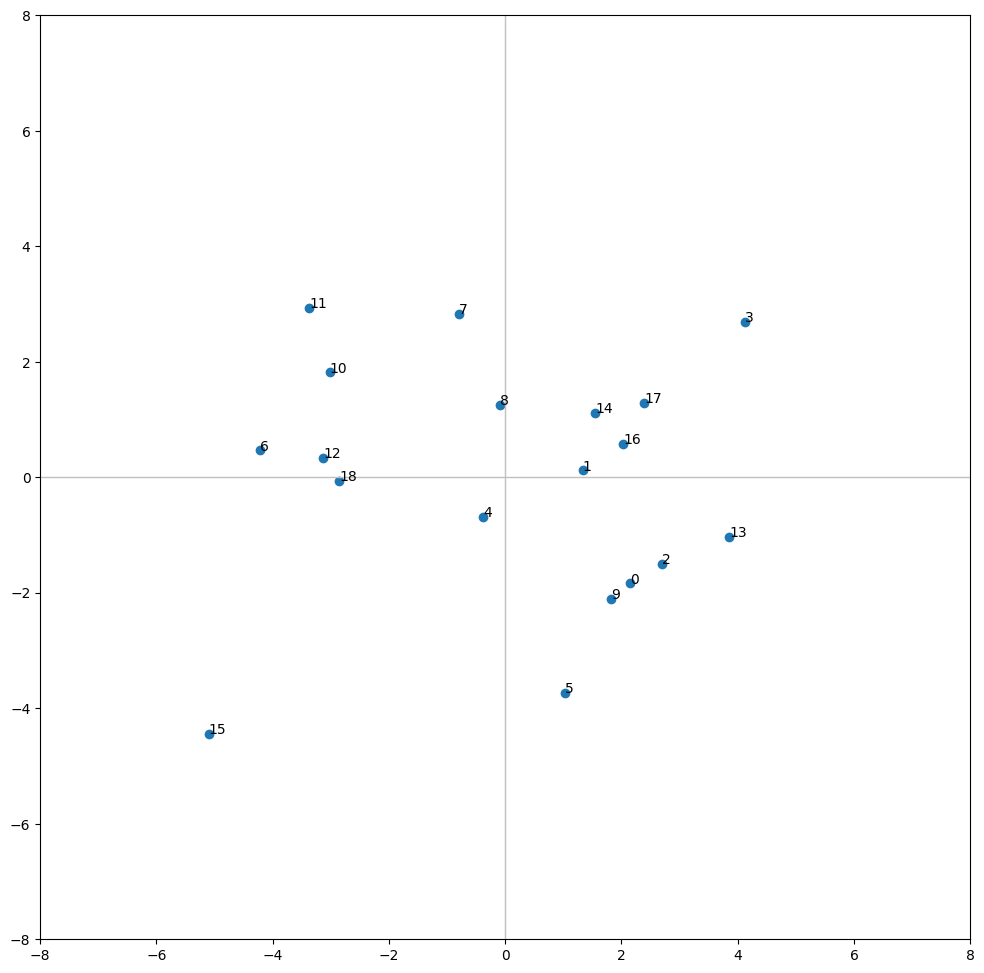

In [240]:
# Creation of the graph
fig, ax = plt.subplots(figsize=(12,12))
ax.set_xlim(-8,8)
ax.set_ylim(-8,8)

# Placement of the points
plt.scatter(coord[:,0],coord[:,1])

# Placement of the observation labels
for i in range(len(Z)):
     plt.annotate(data.index[i],(coord[i,0],coord[i,1]))

# Addition of axes
plt.plot([-8,8],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-8,8],color='silver',linestyle='-',linewidth=1)

# Display
plt.show()

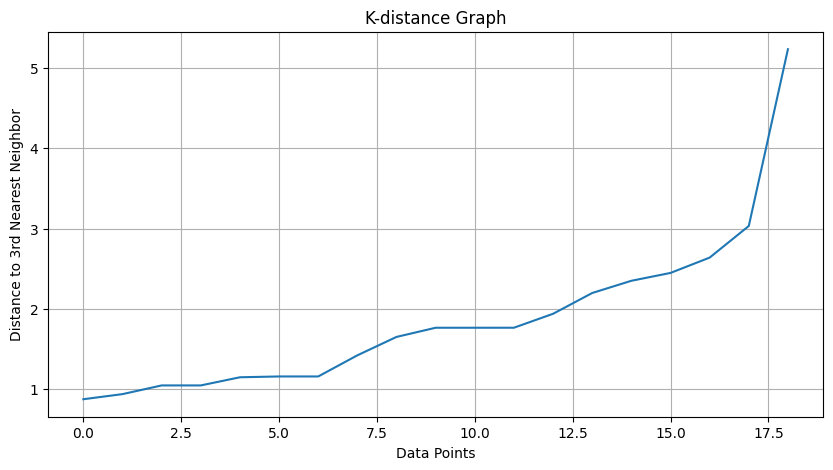

[0.87756265 0.94097292 1.04919926 1.04919926 1.15065838 1.16070987
 1.16070987 1.42362056 1.65263598 1.76673421 1.76673421 1.76695975
 1.94042935 2.19887786 2.35085085 2.44859889 2.63921009 3.03229508
 5.23146863]


In [241]:
from sklearn.neighbors import NearestNeighbors

# Assuming 'Z' is your scaled dataset from previous parts
# Calculate the distances to the 3 nearest neighbors
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(Z)
distances, indices = neighbors_fit.kneighbors(Z)

# Sort the distances to the 3rd nearest neighbor
distances = np.sort(distances, axis=0)
distances = distances[:,2]

# Plot the distances
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Data Points')
plt.ylabel('Distance to 3rd Nearest Neighbor')
plt.grid()
plt.show()

print(distances)


We can see that the optimal value of 'eps' is 2,22 because it is the value where the graph shows a significant increase.

Cluster Labels: [ 0  0  0 -1  0  0  1  0  0  0  1  1  1  0  0 -1  0  0  1]
Estimated number of clusters: 2
Estimated number of noise points: 2


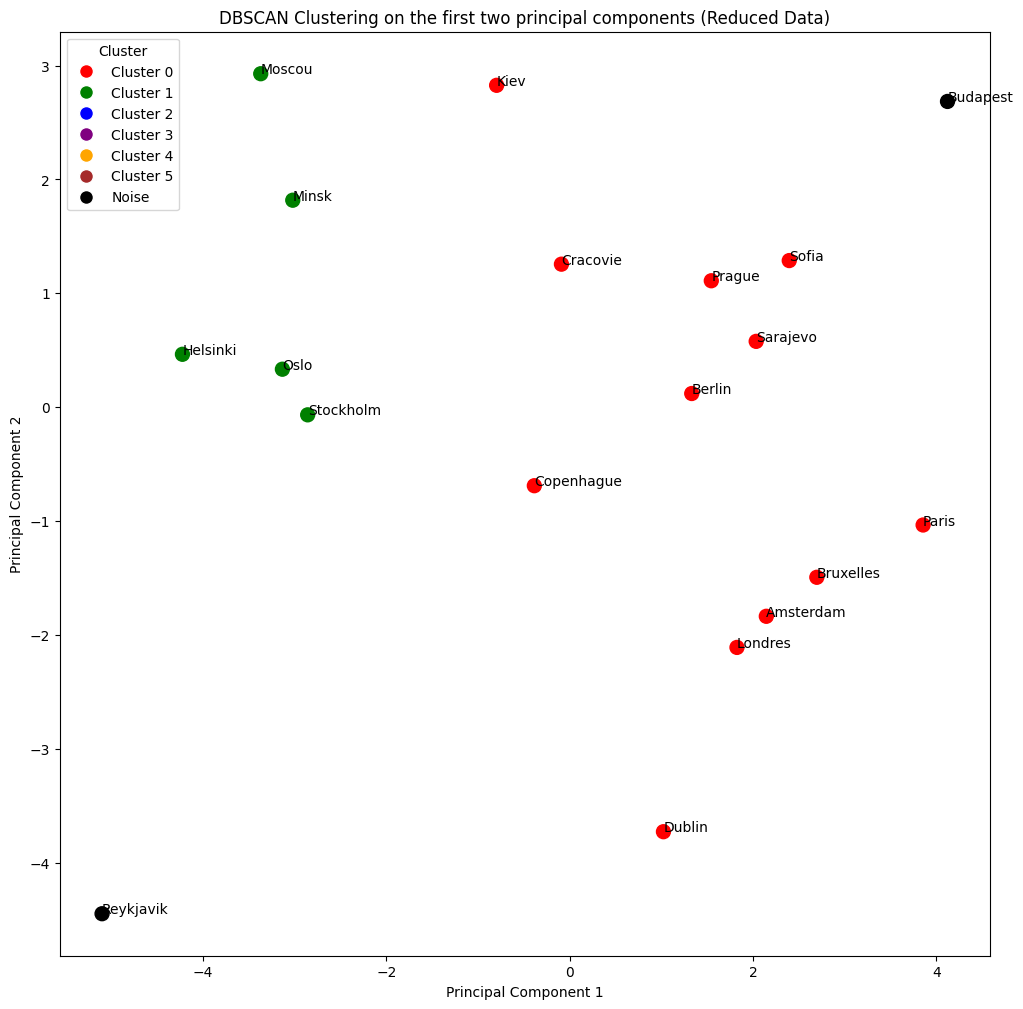

In [242]:
# prompt: Apply DBSCAN to the reduced dataset using the optimal ‘eps’ value and analyze the resulting
# clusters.

# Assuming 'Z' is your scaled dataset and 'optimal_eps' is determined from the k-distance graph
# Apply DBSCAN with the optimal eps value
dbscan = DBSCAN(eps=2.22, min_samples=3) # Adjust min_samples if necessary
clusters = dbscan.fit_predict(Z)

# Analyze the obtained clusters
print("Cluster Labels:", clusters)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

# Add cluster labels to the DataFrame
df_Z['DBSCAN_Cluster'] = clusters


fig, ax = plt.subplots(figsize=(12, 12))

# Define colors for each cluster, including noise
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown'] # Add more colors if needed
cluster_colors = [colors[label % len(colors)] if label != -1 else 'black' for label in df_Z['DBSCAN_Cluster']]

# Scatter plot of the individuals
scatter = ax.scatter(coord[:, 0], coord[:, 1], c=cluster_colors, s=100)

# Adding labels to the points
for i in range(len(coord)):
    ax.annotate(data['Ville'][i], (coord[i, 0], coord[i, 1]))

# Adding titles and labels
ax.set_title('DBSCAN Clustering on the first two principal components (Reduced Data)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')


# Create a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]
labels = [f'Cluster {i}' for i in range(len(colors))]
handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10, label='Noise'))
labels.append('Noise')
ax.legend(handles, labels, title='Cluster')

# Display the plot
plt.show()

We can see that there is a clear distinction between cities in Northern Europe and those in the rest of Europe.